explained variance ratio (first two components): [0.92461872 0.05306648]


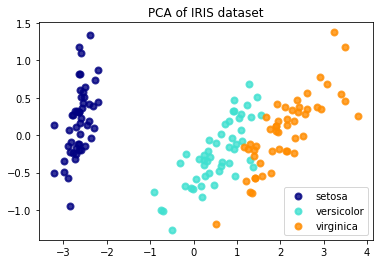

explained variance ratio (all components): [0.92461872 0.05306648 0.01710261 0.00521218]
explained variance by two main components: 0.977685


In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA


iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.show()

pca = PCA()
X_r = pca.fit(X).transform(X)
# Percentage of variance explained for each components
print(
    "explained variance ratio (all components): %s"
    % str(pca.explained_variance_ratio_)
)


print(
    "explained variance by two main components: %f" 
    % (pca.explained_variance_ratio_[:2].sum()/pca.explained_variance_ratio_.sum()))

100%|█████████████████████████████████████████████████████████████████████████| 41537/41537 [00:00<00:00, 150171.02it/s]


explained variance by 2 main components: 0.334023
explained variance by 3 main components: 0.425656
explained variance by 4 main components: 0.499457
explained variance by 5 main components: 0.550687
explained variance by 6 main components: 0.598860
explained variance by 7 main components: 0.639672
explained variance by 8 main components: 0.662591
explained variance by 9 main components: 0.680484
explained variance by 10 main components: 0.695386
explained variance by 11 main components: 0.707629
explained variance by 12 main components: 0.719342
explained variance by 13 main components: 0.730171
explained variance by 14 main components: 0.740248
explained variance by 15 main components: 0.749769
explained variance by 16 main components: 0.758544
explained variance by 17 main components: 0.766673
explained variance by 18 main components: 0.773965
explained variance by 19 main components: 0.780667
explained variance by 20 main components: 0.787259
explained variance by 21 main component

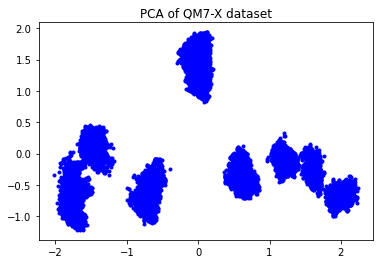

In [2]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import numpy as np
from tqdm import tqdm
from scipy.spatial.distance import pdist
from sklearn import linear_model

# Loading the dataset
dataset = np.load('qm7x_eq.npz', allow_pickle=True)

# Importing data
EAT = dataset['EAT'] # atomization energy
xyz = dataset['xyz'] # Cartesian coordinates
Z = dataset['Z'] # atomic indexes

# Descriptor
def descriptor(R):
    
    nconfig = len(R)
    D = []
    for i in tqdm(range(nconfig)):
        D.append(1./pdist(R[i]))
    
    return D

d = descriptor(xyz)

# Making all descriptor entries of the same size
max_size = np.max([len(_) for _ in d])
nconfig = len(d)
D = np.zeros((nconfig, max_size))

for i in range(nconfig):
    size = len(d[i])
    D[i, :size] = d[i]


pca = PCA()
X_r = pca.fit(D).transform(D)

for n in range(2, 51):
    print(
        "explained variance by %d main components: %f" 
        % (n, pca.explained_variance_ratio_[:n].sum()/pca.explained_variance_ratio_.sum()))


pca = PCA(n_components=2)
X_r = pca.fit(D).transform(D)   
plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1], color='blue', marker='.')
plt.title("PCA of QM7-X dataset")
plt.savefig('PCA QM7-X.png', dpi=600)
plt.show()

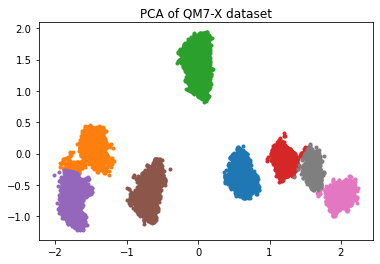

In [9]:
from sklearn.cluster import KMeans
from matplotlib import cm

n_clusters=8
clustering = KMeans(n_clusters=n_clusters).fit(X_r)
labels = clustering.labels_
 
plt.figure()
for i in range(n_clusters):
    plt.scatter(X_r[labels == i, 0], X_r[labels == i, 1], marker='.')
plt.title("PCA of QM7-X dataset")
plt.savefig('PCA QM7-X cluters.png', dpi=600)
plt.show()